# Installing Libraries

In [95]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib
!pip install mlxtend
!pip install seaborn
!pip install plotly





# Importing Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Dataset

In [77]:
basket=pd.read_csv("Data\groceries.csv",header=None)
basket.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
basket.shape

(9835, 32)

# Data Preprocessing

In [79]:
basket=basket.astype(str)
groceries_list=np.unique(basket.values)
groceries_unique_list=groceries_list[groceries_list!='nan']
print(groceries_unique_list)
print()
print("Total Number Of Unique Items In Market Is :",groceries_unique_list.size)

['Instant food products' 'UHT-milk' 'abrasive cleaner' 'artif. sweetener'
 'baby cosmetics' 'baby food' 'bags' 'baking powder' 'bathroom cleaner'
 'beef' 'berries' 'beverages' 'bottled beer' 'bottled water' 'brandy'
 'brown bread' 'butter' 'butter milk' 'cake bar' 'candles' 'candy'
 'canned beer' 'canned fish' 'canned fruit' 'canned vegetables' 'cat food'
 'cereals' 'chewing gum' 'chicken' 'chocolate' 'chocolate marshmallow'
 'citrus fruit' 'cleaner' 'cling film/bags' 'cocoa drinks' 'coffee'
 'condensed milk' 'cooking chocolate' 'cookware' 'cream' 'cream cheese'
 'curd' 'curd cheese' 'decalcifier' 'dental care' 'dessert' 'detergent'
 'dish cleaner' 'dishes' 'dog food' 'domestic eggs'
 'female sanitary products' 'finished products' 'fish' 'flour'
 'flower (seeds)' 'flower soil/fertilizer' 'frankfurter' 'frozen chicken'
 'frozen dessert' 'frozen fish' 'frozen fruits' 'frozen meals'
 'frozen potato products' 'frozen vegetables' 'fruit/vegetable juice'
 'grapes' 'hair spray' 'ham' 'hamburg

In [80]:
from mlxtend.preprocessing import TransactionEncoder
groceries = basket.values
encoder = TransactionEncoder()
onehot = encoder.fit_transform(groceries)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_).drop('nan',axis=1)
onehot_df=onehot_df.astype(int)
onehot_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
purchased_items=onehot_df.sum().sort_values(ascending=False).reset_index()
purchased_items.columns=["Item_Name","Item_Count"]
print(purchased_items.head())
print()
total_item_count=purchased_items["Item_Count"].sum()
print("Total items sold :",total_item_count)

          Item_Name  Item_Count
0        whole milk        2513
1  other vegetables        1903
2        rolls/buns        1809
3              soda        1715
4            yogurt        1372

Total items sold : 43367


# Exploratory Data Analysis

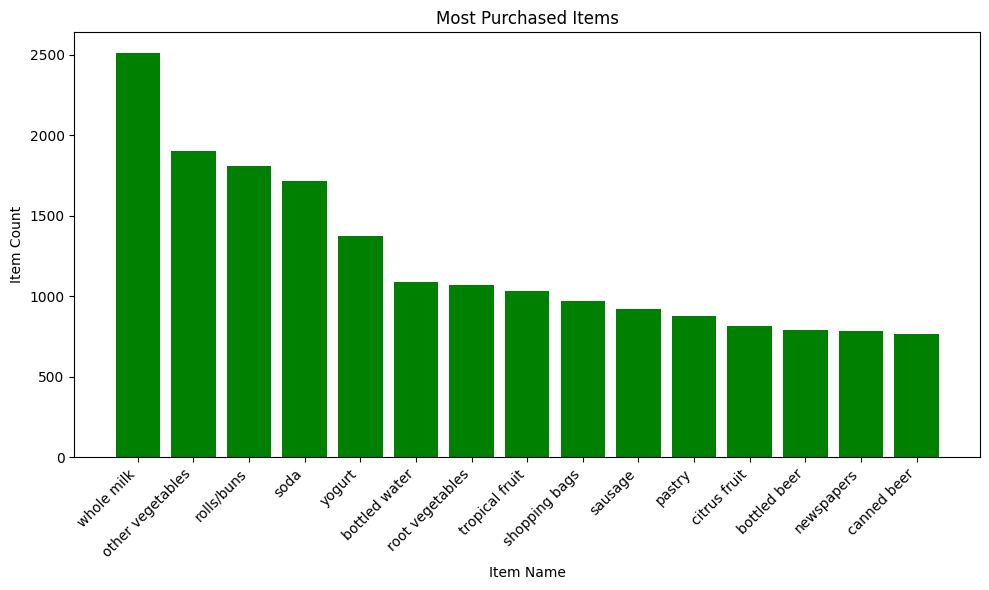

In [82]:
plt.figure(figsize=(10,6))
plt.bar(purchased_items['Item_Name'].head(15),purchased_items['Item_Count'].head(15),color="green")
plt.title('Most Purchased Items')
plt.xlabel('Item Name')
plt.ylabel('Item Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

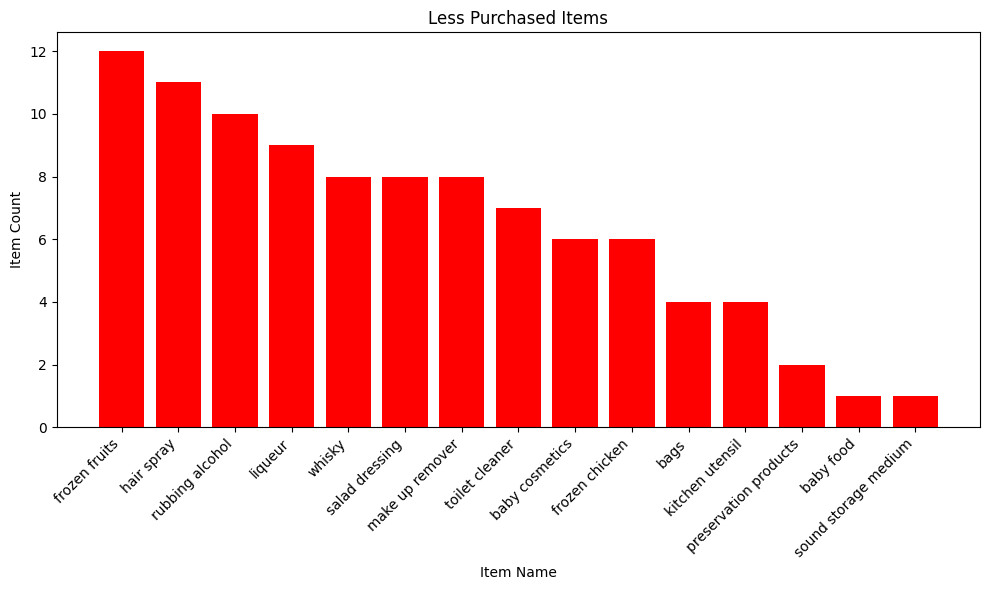

In [9]:
plt.figure(figsize=(10,6))
plt.bar(purchased_items['Item_Name'].tail(15),purchased_items['Item_Count'].tail(15),color="red")
plt.title('Less Purchased Items')
plt.xlabel('Item Name')
plt.ylabel('Item Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [83]:
corr=onehot_df.corr()
corr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Instant food products,1.000000,0.008598,-0.005378,-0.005141,-0.002223,-0.000907,-0.001815,0.013845,-0.004721,0.019695,...,0.017214,0.006884,-0.000215,0.005904,-0.002568,0.026516,-0.012528,0.025631,0.009795,0.033731
UHT-milk,0.008598,1.000000,-0.011118,0.029089,-0.004596,-0.001876,-0.003753,0.013637,0.011853,-0.008271,...,0.014629,0.013074,0.024576,0.014065,-0.005308,-0.002391,-0.013479,-0.058426,0.044235,0.025421
abrasive cleaner,-0.005378,-0.011118,1.000000,0.026568,-0.001477,-0.000603,-0.001205,-0.008020,0.029497,0.031886,...,-0.005412,0.037635,0.005816,0.036346,-0.001705,0.012982,0.004182,0.027627,0.025220,-0.004986
artif. sweetener,-0.005141,0.029089,0.026568,1.000000,-0.001412,-0.000576,-0.001152,0.032963,-0.002998,-0.005436,...,-0.005174,0.017582,-0.002135,-0.008955,-0.001630,0.005806,-0.007954,0.011558,0.033681,-0.004767
baby cosmetics,-0.002223,-0.004596,-0.001477,-0.001412,1.000000,-0.000249,-0.000498,0.027920,-0.001296,-0.005814,...,-0.002237,-0.002000,0.016481,0.009097,-0.000705,0.015327,-0.003440,0.013850,-0.009948,-0.002062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.026516,-0.002391,0.012982,0.005806,0.015327,0.048104,-0.004228,0.029481,-0.001321,0.018802,...,0.014840,0.008224,0.050277,0.047744,-0.005981,1.000000,-0.010647,0.072230,0.045665,-0.005270
white wine,-0.012528,-0.013479,0.004182,-0.007954,-0.003440,-0.001404,-0.002808,0.003906,-0.007305,0.003970,...,-0.004319,-0.002008,-0.020088,-0.024256,0.022142,-0.010647,1.000000,-0.037180,-0.013079,-0.011617
whole milk,0.025631,-0.058426,0.027627,0.011558,0.013850,-0.005908,-0.000255,0.082301,-0.004005,0.080670,...,0.040381,0.027970,0.034458,0.123684,-0.008538,0.072230,-0.037180,1.000000,0.134862,-0.001055
yogurt,0.009795,0.044235,0.025220,0.033681,-0.009948,0.025045,0.006433,0.046140,0.023744,0.056620,...,0.038683,0.033111,0.032467,0.120193,-0.001194,0.045665,-0.013079,0.134862,1.000000,0.015986


# Visualizing Correlation Among Items

In [126]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.index,
    y=corr.columns,
    colorscale='Inferno',
    zmin=-1,  
    zmax=1, 
    text=np.around(corr_df_subset1.values, decimals=2),
))
fig.update_layout(
    title='Correlation Heatmap ',
    xaxis=dict(title='Features', tickangle=-45),
    yaxis=dict(title='Features'),
    autosize=False,
    width=2000,
    height=2000,
    margin=dict(l=100, r=100, t=100, b=100),
)
fig.update_layout(coloraxis_colorbar=dict(title='Correlation'))
fig.write_html('correlation_heatmap_plotly.html', auto_open=True)

In [84]:
pos_corr=corr.where(corr>0,0)
pos_corr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Instant food products,1.000000,0.008598,0.000000,0.000000,0.000000,0.000000,0.000000,0.013845,0.000000,0.019695,...,0.017214,0.006884,0.000000,0.005904,0.000000,0.026516,0.000000,0.025631,0.009795,0.033731
UHT-milk,0.008598,1.000000,0.000000,0.029089,0.000000,0.000000,0.000000,0.013637,0.011853,0.000000,...,0.014629,0.013074,0.024576,0.014065,0.000000,0.000000,0.000000,0.000000,0.044235,0.025421
abrasive cleaner,0.000000,0.000000,1.000000,0.026568,0.000000,0.000000,0.000000,0.000000,0.029497,0.031886,...,0.000000,0.037635,0.005816,0.036346,0.000000,0.012982,0.004182,0.027627,0.025220,0.000000
artif. sweetener,0.000000,0.029089,0.026568,1.000000,0.000000,0.000000,0.000000,0.032963,0.000000,0.000000,...,0.000000,0.017582,0.000000,0.000000,0.000000,0.005806,0.000000,0.011558,0.033681,0.000000
baby cosmetics,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.027920,0.000000,0.000000,...,0.000000,0.000000,0.016481,0.009097,0.000000,0.015327,0.000000,0.013850,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.026516,0.000000,0.012982,0.005806,0.015327,0.048104,0.000000,0.029481,0.000000,0.018802,...,0.014840,0.008224,0.050277,0.047744,0.000000,1.000000,0.000000,0.072230,0.045665,0.000000
white wine,0.000000,0.000000,0.004182,0.000000,0.000000,0.000000,0.000000,0.003906,0.000000,0.003970,...,0.000000,0.000000,0.000000,0.000000,0.022142,0.000000,1.000000,0.000000,0.000000,0.000000
whole milk,0.025631,0.000000,0.027627,0.011558,0.013850,0.000000,0.000000,0.082301,0.000000,0.080670,...,0.040381,0.027970,0.034458,0.123684,0.000000,0.072230,0.000000,1.000000,0.134862,0.000000
yogurt,0.009795,0.044235,0.025220,0.033681,0.000000,0.025045,0.006433,0.046140,0.023744,0.056620,...,0.038683,0.033111,0.032467,0.120193,0.000000,0.045665,0.000000,0.134862,1.000000,0.015986


# Training Model With FP-Growth Algorithm

In [85]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [86]:
frequent_itemsets = fpgrowth(onehot_df, min_support=0.0025, use_colnames=True)
rule_set = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.45)

C:\Users\srisa\Desktop\Coapps Project\BasketAnalysis\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [87]:
frequent_itemsets 

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
2955,0.003355,"(mayonnaise, whole milk)"
2956,0.002542,"(mayonnaise, root vegetables)"
2957,0.003559,"(mayonnaise, other vegetables)"
2958,0.002745,"(whole milk, kitchen towels)"


# Deriving Rule Set For Recommendations

In [88]:
rule_set

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(yogurt, citrus fruit)",(whole milk),0.021657,0.255516,0.010269,0.474178,1.855768,0.004736,1.415849,0.471348
1,"(other vegetables, yogurt, citrus fruit)",(whole milk),0.007626,0.255516,0.004779,0.626667,2.452553,0.002830,1.994154,0.596813
2,"(yogurt, whole milk, citrus fruit)",(other vegetables),0.010269,0.193493,0.004779,0.465347,2.404983,0.002792,1.508467,0.590258
3,"(tropical fruit, citrus fruit)",(whole milk),0.019929,0.255516,0.009049,0.454082,1.777116,0.003957,1.363728,0.446182
4,"(tropical fruit, citrus fruit)",(other vegetables),0.019929,0.193493,0.009049,0.454082,2.346765,0.005193,1.477341,0.585551
...,...,...,...,...,...,...,...,...,...,...
877,(soups),(other vegetables),0.006812,0.193493,0.003152,0.462687,2.391236,0.001834,1.501000,0.585797
878,(roll products),(other vegetables),0.010269,0.193493,0.004779,0.465347,2.404983,0.002792,1.508467,0.590258
879,(roll products),(whole milk),0.010269,0.255516,0.004677,0.455446,1.782454,0.002053,1.367143,0.443531
880,(kitchen towels),(whole milk),0.005999,0.255516,0.002745,0.457627,1.790992,0.001212,1.372642,0.444316


# Visualizing Relationships Between Support,Confidence & Lift

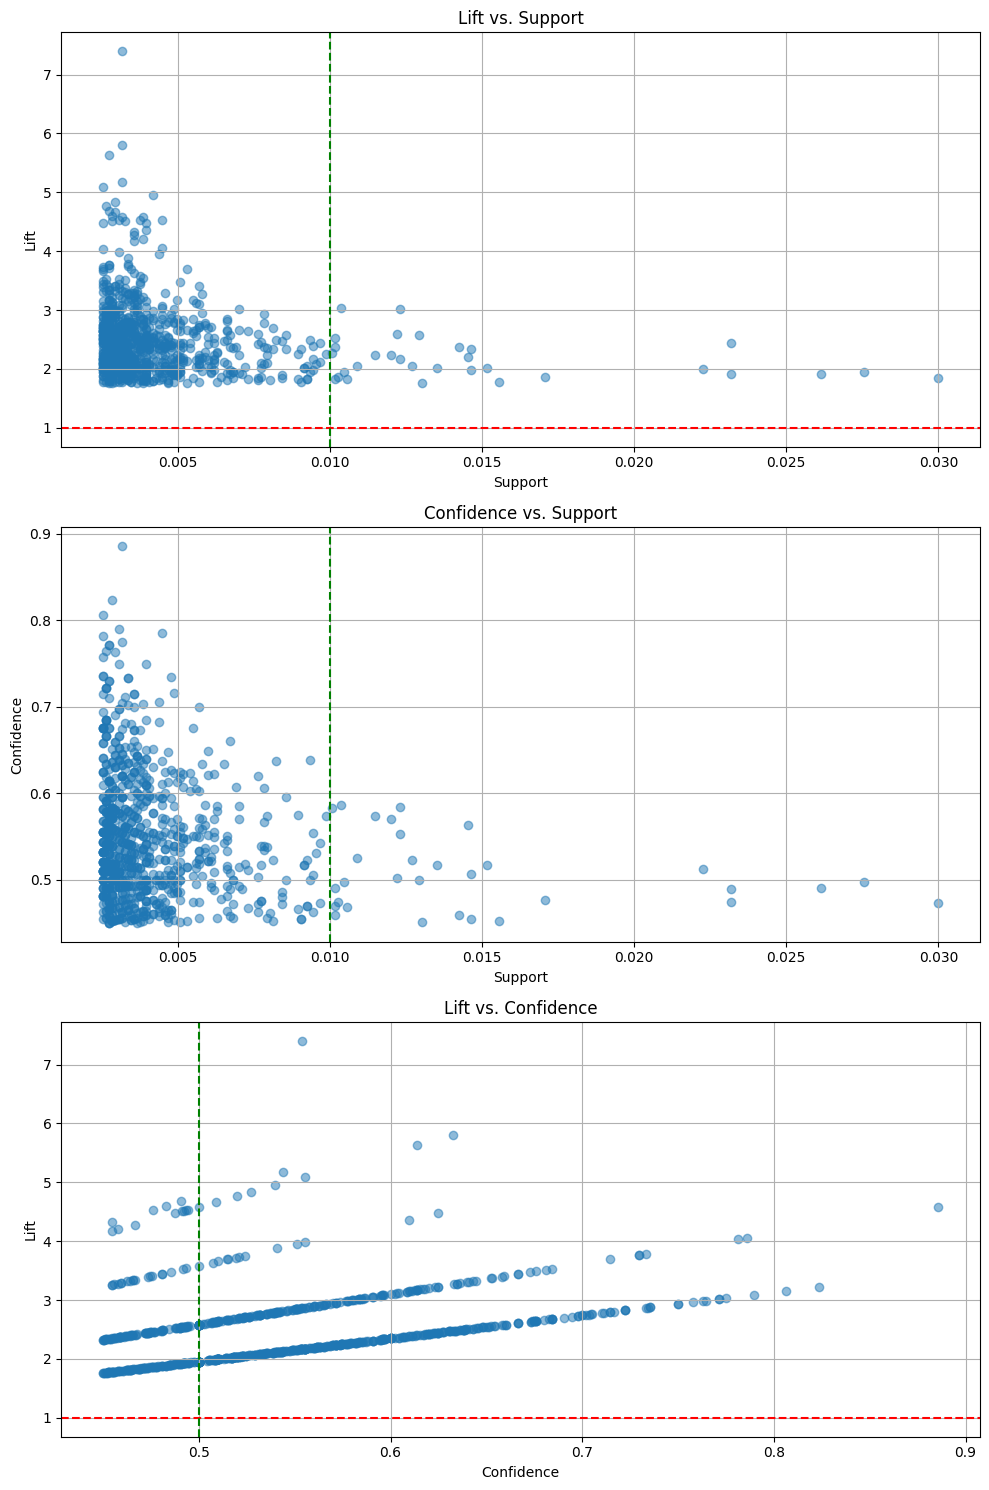

In [127]:
fig,axs=plt.subplots(3,1,figsize=(10,15))
# Lift and Support Plot
axs[0].scatter(rule_set['support'],rule_set['lift'],alpha=0.5)
axs[0].set_xlabel('Support')
axs[0].set_ylabel('Lift')
axs[0].set_title('Lift vs. Support')
axs[0].axhline(y=1, color='r', linestyle='--')
axs[0].axvline(x=0.01, color='g', linestyle='--')
axs[0].grid(True)

# Scatter Plot for Support vs. Confidence
axs[1].scatter(rule_set['support'],rule_set['confidence'],alpha=0.5)
axs[1].set_xlabel('Support')
axs[1].set_ylabel('Confidence')
axs[1].set_title('Confidence vs. Support')
axs[1].axvline(x=0.01, color='g', linestyle='--')
axs[1].grid(True)

# Scatter Plot for Confidence vs. Lift
axs[2].scatter(rule_set['confidence'], rule_set['lift'], alpha=0.5)
axs[2].set_xlabel('Confidence')
axs[2].set_ylabel('Lift')
axs[2].set_title('Lift vs. Confidence')
axs[2].axhline(y=1, color='r', linestyle='--')
axs[2].axvline(x=0.5, color='g', linestyle='--')
axs[2].grid(True)

plt.tight_layout()
plt.show()


# Distribution Of Metrics

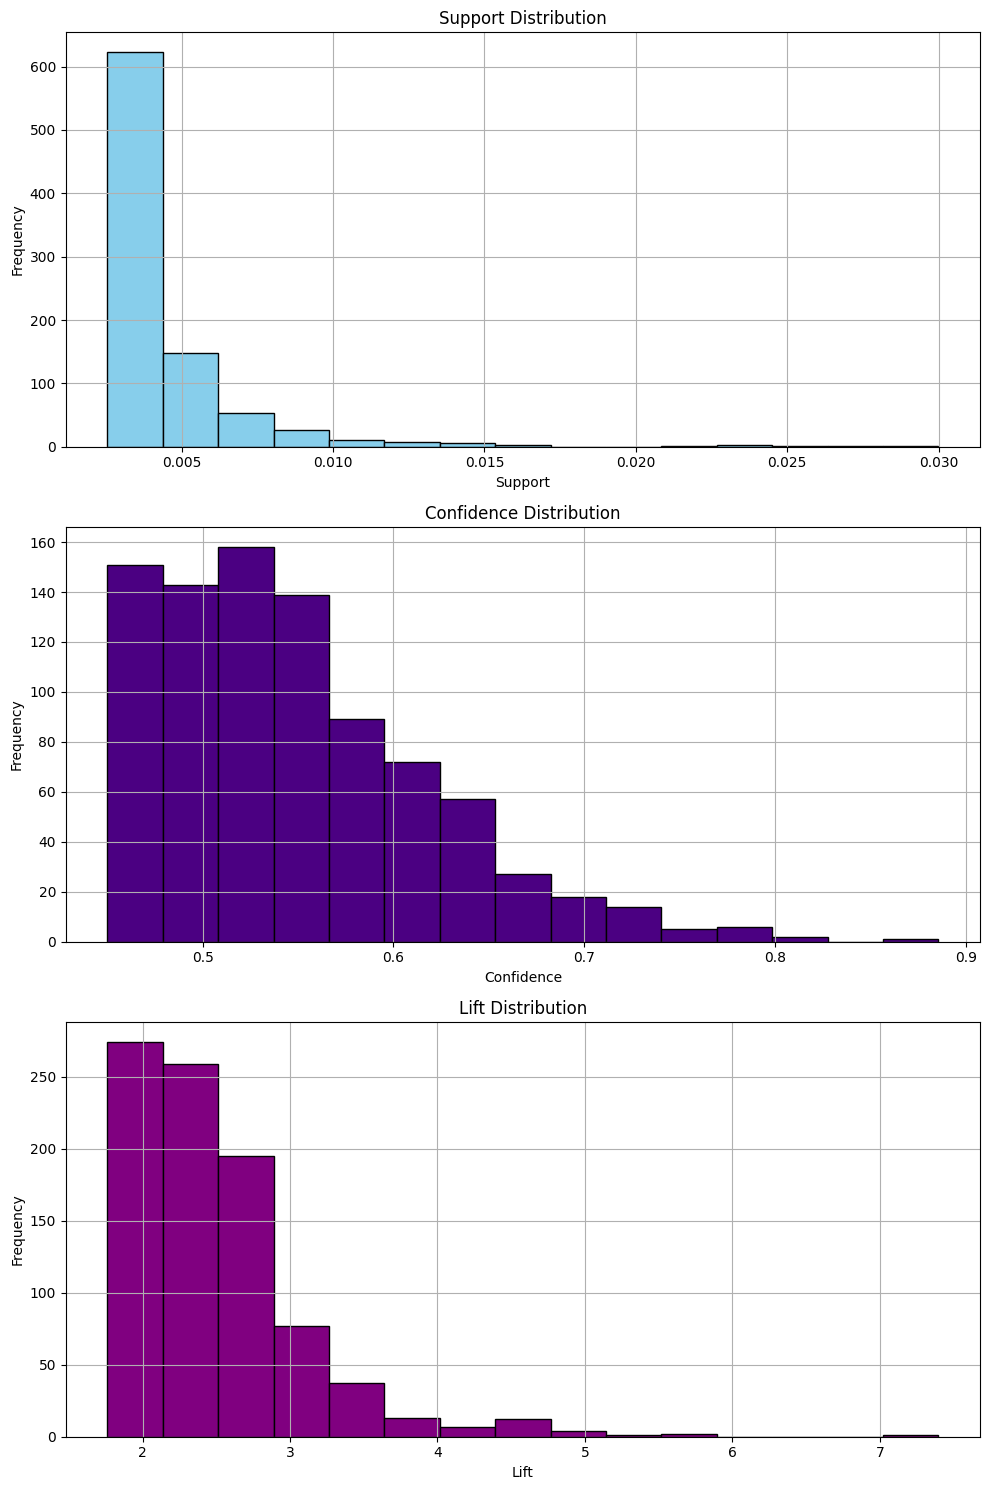

In [129]:
fig, axs = plt.subplots(3, 1, figsize=(10,15))
# Rule Support Distribution
axs[0].hist(rule_set['support'], bins=15, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Support')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Support Distribution')
axs[0].grid(True)
# Rule Confidence Distribution
axs[1].hist(rule_set['confidence'], bins=15, color='indigo', edgecolor='black')
axs[1].set_xlabel('Confidence')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Confidence Distribution')
axs[1].grid(True)
# Rule Lift Distribution
axs[2].hist(rule_set['lift'], bins=15, color='purple', edgecolor='black')
axs[2].set_xlabel('Lift')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Lift Distribution')
axs[2].grid(True)

plt.tight_layout()
plt.show()
